In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
lang = 'telugu'

In [111]:
telugu_df = pd.read_csv(f'data/1000_Ramayana_Prashnottari - {lang}.tsv', sep='\t')
telugu_df

,id,question,answer,telugu,correct,answer.1
0,1,श्रीराम की सेना के दो अभियंता वानरों के नाम बत...,नल-नील,శ్రీరాముని సైన్యంలోని రెండు ఇంజనీర్ వానరుల పేర...,శ్రీరాముని సైన్యములోని ఇద్దరు నిర్మాణవేత్తలయిన...,నలనీలులు
1,2,जिस विमान पर बैठकर श्रीराम लक्ष्मण-सीता सहित ल...,पुष्पक,ఎట్టివిమానం ఎక్కి శ్రీరాముడు లక్ష్మణుడు సీతతో ...,శ్రీరాముడు సీతతోను లక్ష్మణునితోను కలిసి లంకనుం...,పుష్పక విమానం
2,3,"लंका के उस प्रसिद्ध वैद्य का क्या नाम था, जिसे...",सुषेण,"లంకలోని ప్రసిద్ధ వైద్యుని పేరు ఏమిటి, లక్రమణుడ...",లక్ష్మణుని మూర్ఛనుండి కోలుకునేట్టు చేసిన లంకలో...,సుషేణుడు
3,4,लक्ष्मण की मूर्च्छा दूर करने हेतु हनुमानजी जो ...,संजीवनी बूटी,లక్ష్మణుడి మూర్చనను పోగొట్టడానికి హనుమంతుడు తీ...,లక్ష్మణుడు మూర్ఛనుండి కోలుకోవుటకు హనుమంతుడు గై...,సంజీవని
4,5,राजा जनक का मूल नाम क्या था ?,सीरध्वज,రాజా జనకుని అసలు పేరు ఏమిటి?,జనక మహారాజుయొక్క వాస్తవిక నామము ఏమిటి?,సీరధ్వజుడు
...,...,...,...,...,...,...
995,996,महिरावण (अद्भुत रामायण के अनुसार) रावण का कौन ...,पुत्र,మహిరావణ (అద్భుత రామాయణం ప్రకారం) రావణుడికి ఎవరు?,మహిరావణ (అద్భుత రామాయణం ప్రకారం) రావణునికి ఎవరు?,కొడుకు
996,997,श्रीराम के अश्वमेध यज्ञ में सीताजों के स्थान प...,स्वर्ण,శ్రీరాముని అశ్వమేధ యాగంలో సీతను స్థానం చేయగా ఆ...,శ్రీరాముని అశ్వమేధ యాగంలో సీతను స్థానంలో ఆమె ర...,బంగారం
997,998,गंधर्वराज शैलूष विभीषण का क्या लगता था ?,श्वसुर,గంధర్వరాజు శైలూష చీల వంశం లో ఎవరు?,గంధర్వరాజు శైలూషుడు విభీషుణికి ఏమవుతాడు?,మావగారు
998,999,भरत-शत्रुघ्न के श्वसुर कौन थे ?,कुशध्वज,భరతశతృఘ్నుల మామయ్యలు ఎవరు?,భరతశతృఘ్నుల మావగారు ఎవరు?,కుశధ్వజుడు


In [112]:
columns_todrop = ['question', 'answer', 'answer.1', 'id']
for col in telugu_df.columns:
    if 'Unnamed' in col:
        columns_todrop.append(col)
telugu_df.drop(columns=columns_todrop, inplace=True)
telugu_df.dropna(inplace=True)

In [113]:
telugu_df['len'] = telugu_df.apply(lambda x: len(x[lang]), axis=1)

In [114]:
telugu_df

,telugu,correct,len
0,శ్రీరాముని సైన్యంలోని రెండు ఇంజనీర్ వానరుల పేర...,శ్రీరాముని సైన్యములోని ఇద్దరు నిర్మాణవేత్తలయిన...,59
1,ఎట్టివిమానం ఎక్కి శ్రీరాముడు లక్ష్మణుడు సీతతో ...,శ్రీరాముడు సీతతోను లక్ష్మణునితోను కలిసి లంకనుం...,96
2,"లంకలోని ప్రసిద్ధ వైద్యుని పేరు ఏమిటి, లక్రమణుడ...",లక్ష్మణుని మూర్ఛనుండి కోలుకునేట్టు చేసిన లంకలో...,124
3,లక్ష్మణుడి మూర్చనను పోగొట్టడానికి హనుమంతుడు తీ...,లక్ష్మణుడు మూర్ఛనుండి కోలుకోవుటకు హనుమంతుడు గై...,73
4,రాజా జనకుని అసలు పేరు ఏమిటి?,జనక మహారాజుయొక్క వాస్తవిక నామము ఏమిటి?,28
...,...,...,...
995,మహిరావణ (అద్భుత రామాయణం ప్రకారం) రావణుడికి ఎవరు?,మహిరావణ (అద్భుత రామాయణం ప్రకారం) రావణునికి ఎవరు?,48
996,శ్రీరాముని అశ్వమేధ యాగంలో సీతను స్థానం చేయగా ఆ...,శ్రీరాముని అశ్వమేధ యాగంలో సీతను స్థానంలో ఆమె ర...,95
997,గంధర్వరాజు శైలూష చీల వంశం లో ఎవరు?,గంధర్వరాజు శైలూషుడు విభీషుణికి ఏమవుతాడు?,34
998,భరతశతృఘ్నుల మామయ్యలు ఎవరు?,భరతశతృఘ్నుల మావగారు ఎవరు?,26


In [115]:
from sacrebleu.metrics import BLEU

In [116]:
bleu = BLEU()

In [117]:
bleu.sentence_score(telugu_df.correct[999], [telugu_df[lang][999]]).score

It is recommended to enable `effective_order` for sentence-level BLEU.


85.5526185871245

In [118]:
telugu_df['bleu'] = telugu_df.apply(lambda x: bleu.sentence_score(x[lang], [x['correct']]).score, axis=1)

It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is recommended to enable `effective_order` for sentence-level BLEU.
It is 

In [119]:
telugu_df.drop(columns=[lang,'correct'], inplace=True)

In [120]:
telugu_df['len'].min(), telugu_df['len'].max()

(15, 231)

In [121]:
# number of bins
N = 5

/tmp/ipykernel_1188778/3426080805.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = telugu_df.groupby('length_bin')['bleu'].agg(['mean', 'std']).reset_index()


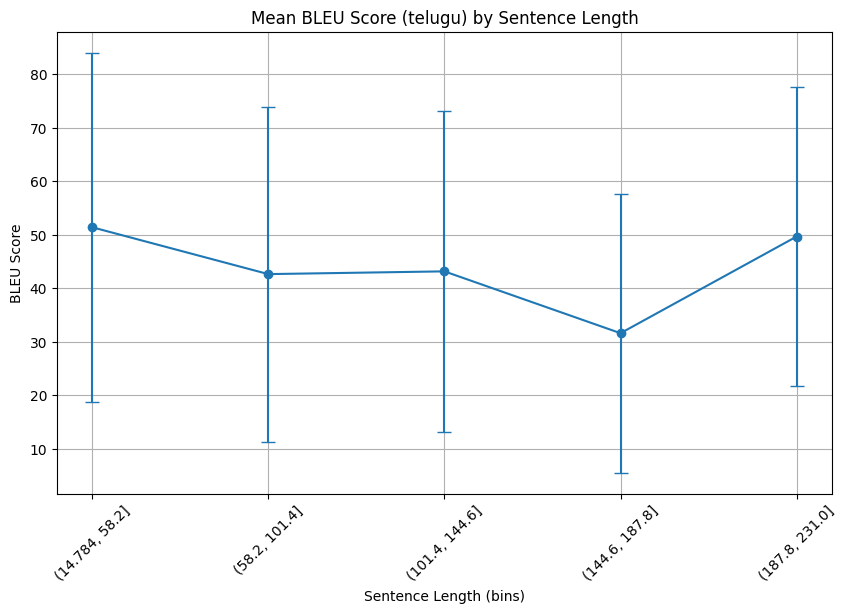

In [122]:
telugu_df['length_bin'] = pd.cut(telugu_df['len'], bins=N)

# Aggregate BLEU scores by bins
agg_df = telugu_df.groupby('length_bin')['bleu'].agg(['mean', 'std']).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(agg_df['length_bin'].astype(str), agg_df['mean'], yerr=agg_df['std'], fmt='o-', capsize=5)
plt.xlabel('Sentence Length (bins)')
plt.ylabel('BLEU Score')
plt.title(f'Mean BLEU Score ({lang}) by Sentence Length')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.savefig(f'results/{lang}.png', bbox_inches='tight')
plt.show()

# Process raw annotated files

In [118]:
src_f = 'data/1000_Ramayana_Prashnottari - sanskrit.tsv'
dst_f = 'data/qa_set/sanskrit.tsv'

In [119]:
df= pd.read_csv(src_f, sep='\t')
df

,id,question,answer,sanskrit,correct,answer.1,MCQ,LLM_Answers,LLM_Answers_append
0,1,श्रीराम की सेना के दो अभियंता वानरों के नाम बत...,नल-नील,श्रीरामस्य सेनायाः द्वौ अभियन्तर-वानरौ नामान्य...,श्रीरामस्य सेनायाः द्वयोः अभियन्तृवानरयोः नामन...,नलनीलौ; नीलनलौ,NaN,हनुमानअङ्गदौ; नीलनलौ; नलः सुग्रीवश्च नलः वानर...,श्रीरामस्य सेनायाः द्वयोः अभियन्तृवानरयोः नामा...
1,2,जिस विमान पर बैठकर श्रीराम लक्ष्मण-सीता सहित ल...,पुष्पक,येन विमानेन श्रीरामः लक्ष्मणसीतेन सहित लङ्कातः...,येन विमानेन श्रीरामः सीतालक्ष्मणाभ्यां सहितः ल...,पुष्पकम्; पुष्पकविमानम्,NaN,पुष्पकम्; पुष्पक ; पुष्पकविमानेन; पुष्पकः ...,तस्य विमानस्य नाम पुष्पकविमानम् आसीत्; विमानस्...
2,3,"लंका के उस प्रसिद्ध वैद्य का क्या नाम था, जिसे...",सुषेण,लङ्कायाः प्रसिद्धः तं वैद्यं लक्ष्मणस्य मूर्च्...,हनुमान् लक्ष्मणस्य मूर्च्छानिवारणाय लङ्कायाः य...,सुषेणः,NaN,सुषेण; संजीवनीम् लक्ष्मणस्य प्राणरक्षणार्थम्; ...,हनुमानः सुषेणः इति प्रसिद्धः वैद्यः लङ्कायाः म...
3,4,लक्ष्मण की मूर्च्छा दूर करने हेतु हनुमानजी जो ...,संजीवनी बूटी,लक्ष्मणस्य मूर्च्छा दूराय हनुमान् याम् औषधिं आ...,लक्ष्मणस्य मूर्च्छायाः दूरीकरणाय हनुमान् याम् ...,सञ्जीवनी,NaN,सञ्जीवनी; विशल्याकरणीम्; सञ्जीवनी सञ्जीवनीम्...,हनुमान् लक्ष्मणस्य मूर्च्छायां दूरीकरणाय सुलोच...
4,5,राजा जनक का मूल नाम क्या था ?,सीरध्वज,राज्ञः जनकस्य किम् मूलं नाम आसीत्?,राज्ञः जनकस्य किं मूलं नाम आसीत् ?,सीरध्वजः,NaN,सीता; मैथिलः; सीरध्वजः; मिथिः; निमि; मिथि; देव...,शिरध्वज; राज्ञः जनकस्य मूलं नाम उदावसुः आसीत्;...
...,...,...,...,...,...,...,...,...,...
995,996,महिरावण (अद्भुत रामायण के अनुसार) रावण का कौन ...,पुत्र,महिरावण (अद्भुत रामायणानुसार) रावणस्य कः भवति?,महिरावणः (अद्भुतरामायणानुसारम्) रावणस्य कः भवति?,पुत्रः,NaN,महिरावणः रावणस्य पुत्रः; अनुजः; महिरावणः अद्भु...,महिरावणः अद्भुतरामायणानुसारम् रावणस्य कः भवति ...
996,997,श्रीराम के अश्वमेध यज्ञ में सीताजों के स्थान प...,स्वर्ण,श्रीरामस्य अश्वमेध यज्ञे सीतायाः स्थाने यस्या ...,श्रीरामस्य अश्वमेधयज्ञे सीतायाः स्थाने या प्रत...,स्वर्णेन,NaN,स्वर्णम्; स्वर्णेन; सुवर्णेन; काष्ठः; सुवर्णमय...,स्वर्णेन; वास्तुक; श्रीरामस्य अश्वमेधयज्ञे सीत...
997,998,गंधर्वराज शैलूष विभीषण का क्या लगता था ?,श्वसुर,गन्धर्वराजः शैलूषः विभीषणस्य कः आसीत्?,गन्धर्वराजः शैलूषः विभीषणस्य कः आसीत्?,श्वशुरः,NaN,श्वशुरः; गन्धर्वराजः शैलूषः विभीषणस्य मित्रम् ...,नाना; गन्धर्वराजः शैलूषः विभीषणस्य मित्रः आसीत...
998,999,भरत-शत्रुघ्न के श्वसुर कौन थे ?,कुशध्वज,भरतशत्रुघ्नयोः श्वशुरः कः आसीत्?,भरतशत्रुघ्नयोः श्वशुरः कः आसीत्?,कुशध्वजः,NaN,कुशध्वजः; अश्वपति; कैकेय्याः पिता अशोकदत्तः वा...,जानकी; जनकः; भरतशत्रुघ्नयोः श्वशुरः दशरथः राजा...


In [120]:
df=df[['id','correct','answer.1','MCQ']].rename(columns={'id':'ID','correct':'QUESTION', 'answer.1':'ANSWER','MCQ':'CHOICES'}).fillna('')

In [121]:
df.to_csv(dst_f, sep='\t', index=False)

### Ayurveda

In [489]:
src_f = 'data/Ayurveda Amartam - Dataset.tsv'
dst_f = 'data/qa_set/ayurveda.tsv'
df= pd.read_csv(src_f, sep='\t')
df

,id,category,chapter_id,verse_id,question,options,answer
0,1001,synonym,8.0,2,तृणधान्यम् कस्य पर्यायः अस्ति,क्षुद्रधान्यम् / धान्यम् / शाकम् / व्रीहिधान्यम्,क्षुद्रधान्यम्
1,1002,synonym,8.0,20,कृष्णतण्डुलः कस्य पर्यायः अस्ति ?,कृष्णः / जतुमुखः / व्रीहि / शालामुखः,शालामुखः
2,1003,synonym,8.0,48,वनमुद्गः कस्य पर्यायः ?,मुद्गः / माषः / क्षुद्रधान्यम् / मकुष्ठकः,मकुष्ठकः
3,1004,list.type,8.0,NaN,शालिधान्यस्य प्रकाराः के सन्ति,NaN,रक्तशालिः + कलमः + पाण्डुकः + शकुनाहृतः + सुगन...
4,1005,count.type,8.0,1,धान्यस्य कति प्रकाराः उक्ताः,NaN,पञ्च
...,...,...,...,...,...,...,...
496,433,NaN,6.0,31,कवलं धारयितुं कल्कस्य का मात्रा गृह्णीयात्?,अर्ध कर्ष / 1 कर्ष / 2 कर्ष / 1 कोल,1 कर्ष
497,439,NaN,6.0,175,वर्त्मगतरोगेषु कियत् वाक्-शतपर्यन्तं तर्पणं का...,100 / 500 / 600 / 700,100
498,441,variant,6.0,199,रसरूपं चूर्णरूपं वर्त्तिरूपं च एते कस्य भेदाः?,पुटपाक / तर्पण / अञ्जन / सेक,अञ्जन
499,443,NaN,7.0,1,भावप्रकाशे उक्ता रोगिणः परीक्षा केन आचार्येण उ...,चरकः / सुश्रुतः / वाग्भट्टः / माधवः,वाग्भट्टः


In [490]:
df=df[['id','question','answer','options']].rename(columns={'id':'ID','question':'QUESTION', 'answer':'ANSWER','options':'CHOICES'}).fillna('')

In [491]:
df.to_csv(dst_f, sep='\t', index=False)

### Cleaning Ayurveda text

In [359]:
src_txt = open("data/ref/bhavaprakasha_nighantu.txt",'r').read()

In [360]:
from indic_transliteration.sanscript import transliterate, DEVANAGARI, IAST
import re

In [361]:
elem_blocks = src_txt.split('\n\n')
len(elem_blocks)

2117

In [371]:
curr_chap = 0
curr_shloka = 0
new_blocks = []
chapter_map = {}
for block in elem_blocks:
    if re.match(r'^\w', block): ## heading
        curr_chap += 1
        chapter_map[curr_chap] = block.strip()
        curr_shloka = 0
    elif re.match(r"^\W+इति\W+श्री", block): ## ending
        chap_num = re.findall(r"([०-९]+)", block)[0]
        try:
            assert(chap_num == transliterate(str(curr_chap), IAST, DEVANAGARI))
        except:
            print(chap_num, transliterate(str(curr_chap), IAST, DEVANAGARI))
    else: ## body
        curr_shloka += 1
        shloka_num = re.findall(r"([०-९]*\.?[०-९]+)", block)[0]
        if '.' in shloka_num:
            chap_num, shloka_num = shloka_num.split('.')
            try:
                assert(chap_num == transliterate(str(curr_chap), IAST, DEVANAGARI))
            except:
                print(chap_num, transliterate(str(curr_chap), IAST, DEVANAGARI))
        new_blocks.append(re.sub(r"([०-९]*\.?[०-९]+)", f"{transliterate(str(curr_chap), IAST, DEVANAGARI)}.{transliterate(str(curr_shloka), IAST, DEVANAGARI)}", block))
        
cleaned_txt = "\n\n".join(new_blocks)

In [372]:
with open("data/ref/ayurveda_dev.txt",'w') as fp:
    fp.write(cleaned_txt)

In [375]:
import json

with open("data/ref/ayurveda_chapter_map.json", 'w') as fp:
    json.dump(chapter_map, fp)

### Generate relevance data for k=4

In [30]:
src_df = pd.read_csv('results/rag/bm25_4.tsv',sep='\t')
aux_df = pd.read_csv('data/bm25_3_rel.tsv',sep='\t')

In [35]:
aux_df = aux_df[['ID','context_0','rel_0','context_1','rel_1','context_2','rel_2']]
src_df = src_df[['ID','context_0','context_1','context_2','context_3']]

In [42]:
aux_df['context_3'] = src_df['context_3'].copy()

/tmp/ipykernel_2575855/4041207194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux_df['context_3'] = src_df['context_3'].copy()


In [46]:
aux_df.to_csv('data/bm25_4_rel.tsv',index=False,sep='\t')

### Combine the answers generated by the LLMs

In [97]:
lang = 'sanskrit'

In [86]:
qa_df = pd.read_csv(f'data/qa_set/{lang}.tsv', sep='\t')

In [112]:
answer_files = [f"results/zero_shot/{lang}_{i}.tsv" for i in range(3)] +\
               [f"results/rag/{emb}_{k+1}.tsv" for k in range(4) for emb in ['bm25','fasttext','glove']]+\
                [f"results/zero_shot/english_0.tsv"]

In [103]:
from tqdm import tqdm
tqdm.pandas()
import string
table = str.maketrans(dict.fromkeys(string.punctuation))  # OR {key: None for key in string.punctuation}

In [101]:
from SktQA.utils import LOW_END_MODELS, DEFAULT_MODELS

In [90]:
qa_df['LLM_Answers'] = qa_df.apply(lambda x: set(), axis=1)
for answer_file in tqdm(answer_files):
    answer_df = pd.read_csv(answer_file, sep='\t').fillna('')
    methods = [col for col in answer_df.columns if col not in ['ID','QUESTION','ANSWER','CHOICES'] + LOW_END_MODELS and 'context' not in col]
    qa_df['LLM_Answers_new'] = answer_df.apply(lambda x: [x[m].translate(table) for m in methods], axis=1)
    qa_df['LLM_Answers'] = qa_df.apply(lambda x: x['LLM_Answers'].union(x['LLM_Answers_new']), axis=1)
qa_df.drop(columns=['LLM_Answers_new'], inplace=True)
qa_df.apply(lambda x: x['LLM_Answers'].remove('') if '' in x['LLM_Answers'] else None, axis=1)
qa_df

100%|███████████████████████████████████████████| 15/15 [00:01<00:00, 13.58it/s]


,ID,QUESTION,ANSWER,CHOICES,LLM_Answers
0,1,श्रीरामस्य सेनायाः द्वयोः अभियन्तृवानरयोः नामन...,नलनीलौ,NaN,"{हनुमानअङ्गदौ, नीलनलौ, नलः सुग्रीवश्च\n\nनलः व..."
1,2,येन विमानेन श्रीरामः सीतालक्ष्मणाभ्यां सहितः ल...,पुष्पकम्,NaN,"{पुष्पकम्, पुष्पक \n\n, पुष्पकविमानेन, पुष्पकः..."
2,3,हनुमान् लक्ष्मणस्य मूर्च्छानिवारणाय लङ्कायाः य...,सुषेणः,NaN,"{सुषेण, संजीवनीम् लक्ष्मणस्य प्राणरक्षणार्थम्,..."
3,4,लक्ष्मणस्य मूर्च्छायाः दूरीकरणाय हनुमान् याम् ...,सञ्जीवनी,NaN,"{सञ्जीवनी, विशल्याकरणीम्, सञ्जीवनी \n\nसञ्जीवन..."
4,5,राज्ञः जनकस्य किं मूलं नाम आसीत् ?,सीरध्वज,NaN,"{सीता, मैथिलः, सीरध्वजः, मिथिः, निमि, मिथि, दे..."
...,...,...,...,...,...
995,996,महिरावणः (अद्भुतरामायणानुसारम्) रावणस्य कः भवति?,पुत्रः,NaN,"{महिरावणः रावणस्य पुत्रः, अनुजः, महिरावणः अद्भ..."
996,997,श्रीरामस्य अश्वमेधयज्ञे सीतायाः स्थाने या प्रत...,स्वर्णेन,NaN,"{स्वर्णम्, स्वर्णेन, सुवर्णेन, काष्ठः, सुवर्णम..."
997,998,गन्धर्वराजः शैलूषः विभीषणस्य कः आसीत्?,श्वशुरः,NaN,"{श्वशुरः, गन्धर्वराजः शैलूषः विभीषणस्य मित्रम्..."
998,999,भरतशत्रुघ्नयोः श्वशुरः कः आसीत्?,कुशध्वजः,NaN,"{कुशध्वजः, अश्वपति, कैकेय्याः पिता अशोकदत्तः व..."


In [91]:
qa_df['LLM_Answers'] = qa_df.apply(lambda x: '; '.join(list(x['LLM_Answers'])), axis=1)

In [92]:
qa_df.to_csv(f'data/{lang}_generated_answers.tsv',index=False,sep='\t')

## Append the answers

In [113]:
qa_df = pd.read_csv(f'data/{lang}_generated_answers.tsv',sep='\t')

In [114]:
qa_df

,ID,QUESTION,ANSWER,CHOICES,LLM_Answers,LLM_Answers_append
0,1,श्रीरामस्य सेनायाः द्वयोः अभियन्तृवानरयोः नामन...,नलनीलौ,NaN,हनुमानअङ्गदौ; नीलनलौ; नलः सुग्रीवश्च\n\nनलः वा...,श्रीरामस्य सेनायाः द्वयोः अभियन्तृवानरयोः नामा...
1,2,येन विमानेन श्रीरामः सीतालक्ष्मणाभ्यां सहितः ल...,पुष्पकम्,NaN,पुष्पकम्; पुष्पक \n\n; पुष्पकविमानेन; पुष्पकः ...,तस्य विमानस्य नाम पुष्पकविमानम् आसीत्; विमानस्...
2,3,हनुमान् लक्ष्मणस्य मूर्च्छानिवारणाय लङ्कायाः य...,सुषेणः,NaN,सुषेण; संजीवनीम् लक्ष्मणस्य प्राणरक्षणार्थम्; ...,हनुमानः सुषेणः इति प्रसिद्धः वैद्यः लङ्कायाः म...
3,4,लक्ष्मणस्य मूर्च्छायाः दूरीकरणाय हनुमान् याम् ...,सञ्जीवनी,NaN,सञ्जीवनी; विशल्याकरणीम्; सञ्जीवनी \n\nसञ्जीवनी...,हनुमान् लक्ष्मणस्य मूर्च्छायां दूरीकरणाय सुलोच...
4,5,राज्ञः जनकस्य किं मूलं नाम आसीत् ?,सीरध्वज,NaN,सीता; मैथिलः; सीरध्वजः; मिथिः; निमि; मिथि; देव...,मूलं नाम आसीत् विदेहः; राज्ञः जनकस्य किं मूलं...
...,...,...,...,...,...,...
995,996,महिरावणः (अद्भुतरामायणानुसारम्) रावणस्य कः भवति?,पुत्रः,NaN,महिरावणः रावणस्य पुत्रः; अनुजः; महिरावणः अद्भु...,महिरावणः अद्भुतरामायणानुसारम् रावणस्य कः भवति\...
996,997,श्रीरामस्य अश्वमेधयज्ञे सीतायाः स्थाने या प्रत...,स्वर्णेन,NaN,स्वर्णम्; स्वर्णेन; सुवर्णेन; काष्ठः; सुवर्णमय...,स्वर्णेन; श्रीरामस्य अश्वमेधयज्ञे सीतायाः स्था...
997,998,गन्धर्वराजः शैलूषः विभीषणस्य कः आसीत्?,श्वशुरः,NaN,श्वशुरः; गन्धर्वराजः शैलूषः विभीषणस्य मित्रम् ...,नाना; गन्धर्वराजः शैलूषः विभीषणस्य मित्रः आसीत...
998,999,भरतशत्रुघ्नयोः श्वशुरः कः आसीत्?,कुशध्वजः,NaN,कुशध्वजः; अश्वपति; कैकेय्याः पिता अशोकदत्तः वा...,जानकी; जनकः; भरतशत्रुघ्नयोः श्वशुरः दशरथः राजा...


In [115]:
qa_df['LLM_Answers_append'] = qa_df.apply(lambda x: set(), axis=1)
for answer_file in tqdm(answer_files):
    answer_df = pd.read_csv(answer_file, sep='\t').fillna('')
    methods = [col for col in answer_df.columns if col not in ['ID','QUESTION','ANSWER','CHOICES'] + DEFAULT_MODELS and 'context' not in col]
    qa_df['LLM_Answers_new'] = answer_df.apply(lambda x: [x[m].translate(table) for m in methods], axis=1)
    qa_df['LLM_Answers_append'] = qa_df.apply(lambda x: x['LLM_Answers_append'].union(x['LLM_Answers_new']), axis=1)
qa_df.drop(columns=['LLM_Answers_new'], inplace=True)
qa_df.apply(lambda x: x['LLM_Answers_append'].remove('') if '' in x['LLM_Answers_append'] else None, axis=1)
qa_df['LLM_Answers_append'] = qa_df.apply(lambda x: x['LLM_Answers_append'].difference(set(x['LLM_Answers'].split())), axis=1)
qa_df

100%|███████████████████████████████████████████| 16/16 [00:01<00:00, 14.77it/s]


,ID,QUESTION,ANSWER,CHOICES,LLM_Answers,LLM_Answers_append
0,1,श्रीरामस्य सेनायाः द्वयोः अभियन्तृवानरयोः नामन...,नलनीलौ,NaN,हनुमानअङ्गदौ; नीलनलौ; नलः सुग्रीवश्च\n\nनलः वा...,{श्रीरामस्य सेनायाः द्वयोः अभियन्तृवानरयोः नाम...
1,2,येन विमानेन श्रीरामः सीतालक्ष्मणाभ्यां सहितः ल...,पुष्पकम्,NaN,पुष्पकम्; पुष्पक \n\n; पुष्पकविमानेन; पुष्पकः ...,"{तस्य विमानस्य नाम पुष्पकविमानम् आसीत्, विमानस..."
2,3,हनुमान् लक्ष्मणस्य मूर्च्छानिवारणाय लङ्कायाः य...,सुषेणः,NaN,सुषेण; संजीवनीम् लक्ष्मणस्य प्राणरक्षणार्थम्; ...,{हनुमानः सुषेणः इति प्रसिद्धः वैद्यः लङ्कायाः ...
3,4,लक्ष्मणस्य मूर्च्छायाः दूरीकरणाय हनुमान् याम् ...,सञ्जीवनी,NaN,सञ्जीवनी; विशल्याकरणीम्; सञ्जीवनी \n\nसञ्जीवनी...,{हनुमान् लक्ष्मणस्य मूर्च्छायां दूरीकरणाय सुलो...
4,5,राज्ञः जनकस्य किं मूलं नाम आसीत् ?,सीरध्वज,NaN,सीता; मैथिलः; सीरध्वजः; मिथिः; निमि; मिथि; देव...,"{शिरध्वज, राज्ञः जनकस्य मूलं नाम उदावसुः आसीत्..."
...,...,...,...,...,...,...
995,996,महिरावणः (अद्भुतरामायणानुसारम्) रावणस्य कः भवति?,पुत्रः,NaN,महिरावणः रावणस्य पुत्रः; अनुजः; महिरावणः अद्भु...,{महिरावणः अद्भुतरामायणानुसारम् रावणस्य कः भवति...
996,997,श्रीरामस्य अश्वमेधयज्ञे सीतायाः स्थाने या प्रत...,स्वर्णेन,NaN,स्वर्णम्; स्वर्णेन; सुवर्णेन; काष्ठः; सुवर्णमय...,"{स्वर्णेन, वास्तुक, श्रीरामस्य अश्वमेधयज्ञे सी..."
997,998,गन्धर्वराजः शैलूषः विभीषणस्य कः आसीत्?,श्वशुरः,NaN,श्वशुरः; गन्धर्वराजः शैलूषः विभीषणस्य मित्रम् ...,"{नाना, गन्धर्वराजः शैलूषः विभीषणस्य मित्रः आसी..."
998,999,भरतशत्रुघ्नयोः श्वशुरः कः आसीत्?,कुशध्वजः,NaN,कुशध्वजः; अश्वपति; कैकेय्याः पिता अशोकदत्तः वा...,"{जानकी, जनकः, भरतशत्रुघ्नयोः श्वशुरः दशरथः राज..."


In [116]:
qa_df['LLM_Answers_append'] = qa_df.apply(lambda x: '; '.join(list(x['LLM_Answers_append'])), axis=1)

In [ ]:
qa_df.to_csv(f'data/{lang}_generated_answers.tsv',index=False,sep='\t')

### Ayurveda dataset

In [485]:
src_df = pd.read_csv("data/Ayurveda Amartam - Fix Sheet.tsv", sep='\t')

In [230]:
skt_df = pd.read_csv("data/Ayurveda Amartam - Sanskrit.tsv", sep='\t')

In [231]:
src_df = src_df[['id', 'answer']]

In [232]:
mapping = {'क':1, 'ख':2, 'ग': 3, 'घ': 4, 'अ':1,'आ':2, 'इ':3, 'ई':4}

In [233]:
src_df['answer_option'] = src_df.apply(lambda x: mapping[x['answer'].strip()],axis=1)

In [234]:
del src_df['answer']

In [235]:
skt_df = skt_df.merge(src_df, how='left', on='id')

In [236]:
import re

option_pattern = re.compile(r"\(\w*[कखगघअआइई]\.?\w*\)([^()]*)")
question_pattern = re.compile(r"([^()]*)")

In [237]:
def extract_options(txt):
    options = option_pattern.findall(txt)
    options = [o.strip() for o in options]
    if len(options) != 4: print(txt)
    return options

def extract_answers(row):
    options = extract_options(row['sanskrit'])
    return options[row['answer_option']-1]

In [238]:
skt_df['sanskrit_corrected'] = skt_df.apply(lambda x: question_pattern.findall(x['sanskrit'])[0].strip(), axis=1)

In [239]:
skt_df['Options '] = skt_df.apply(lambda x: ' / '.join(extract_options(x['sanskrit'])), axis=1)

सुमेलयतु  अ स्थूलवल्कल १ सप्तपर्ण  आ बहुलवल्कल २ भूर्जपत्र  इ विशालत्वक् ३ कटफल  ई सोमवल्कल ४ लोध्र? (क) अ-१, आ-२, इ-३, ई-४ (ख) १-२, आ-१, इ-३, ई-४ (ग) अ-४, आ-२, इ-१, ई-३
अग्निदेवस्य वीर्येण कस्मिन धातुः उत्पन्नः? (क.) स्वर्णम् (ख.) रजतम् (घ.) यशदम्


In [240]:
skt_df['Answer'] = skt_df.apply(extract_answers, axis=1)

सुमेलयतु  अ स्थूलवल्कल १ सप्तपर्ण  आ बहुलवल्कल २ भूर्जपत्र  इ विशालत्वक् ३ कटफल  ई सोमवल्कल ४ लोध्र? (क) अ-१, आ-२, इ-३, ई-४ (ख) १-२, आ-१, इ-३, ई-४ (ग) अ-४, आ-२, इ-१, ई-३
अग्निदेवस्य वीर्येण कस्मिन धातुः उत्पन्नः? (क.) स्वर्णम् (ख.) रजतम् (घ.) यशदम्


In [243]:
skt_df.to_csv('data/Ayurveda Amartam - Sanskrit.tsv', sep='\t', index = False)

### Ayurveda relavance annotation

In [455]:
rel_df = pd.read_csv("data/ayurveda_bm25_4_rel.tsv", sep='\t')

In [456]:
rel_df = rel_df[['ID', 'QUESTION', 'ANSWER', 'CHOICES', 'context_0', 'context_1', 'context_2', 'context_3']]
rel_df

,ID,QUESTION,ANSWER,CHOICES,context_0,context_1,context_2,context_3
0,1,भावप्रकाशननिघण्टौ प्रथमं कस्य वर्गस्य उल्लेखः ...,हरीत्क्यादि,हरीत्क्यादि / आमलक्यादि / हरिद्रादि / गुडूच्यादि,ध्मायमानस्य लोहस्य मलं मण्डूर मुच्यते लोहस...,कर्कशं कोमलं चातिशीतव्यालादिदूषितम् संशुष्...,मासं तु पिशितं क्रव्यमामिषं पललं पलम् ...,उत्तमं क्षुरकं तत्र मिश्रकं त्ववरं मतम् ८.३० ...
1,2,अमृतपानसमये भगवतः इन्द्रस्य मुखात् पृथिव्याम् ...,अभया,गुडूची / अभया / आमलकी / अमृतवल्ली,दक्षं प्रजापतिं स्वस्थमश्विनौ वाक्यमूचतुः ...,द्वितीयादपतन्नेत्रादश्रुबिन्दुस्तु वामकात् ...,प्रपौण्डरीकं पौण्डर्यं चक्षुष्यं पौण्डरीयकम् ...,अथ लङ्केश्वरो मानी रावणो राक्षसाधिपः र...
2,4,हरीतक्याः कति प्रकाराः उक्ताः?,७,३ / ५ / ७ / २,दक्षं प्रजापतिं स्वस्थमश्विनौ वाक्यमूचतुः ...,समितां मर्दयेदाज्यैर्जलेनापि च सन्नयेत् तस...,पथ्याया मज्जनि स्वादुः स्नाय्वामम्लो व्यवस्थित...,माषपिष्टिकया लिप्तं नागवल्लीदलं महत् १२.६६ ...
3,5,कः प्रकारः हरीतक्याः सर्वत्र उपलभ्यते?,रोहिणी,विजया / चेतकी / अभया / रोहिणी,समितां मर्दयेदाज्यैर्जलेनापि च सन्नयेत् तस...,दक्षं प्रजापतिं स्वस्थमश्विनौ वाक्यमूचतुः ...,पथ्याया मज्जनि स्वादुः स्नाय्वामम्लो व्यवस्थित...,हृद्या प्रमेहकासास्रव्रणज्वरहरी लघुः कोमला...
4,6,हरीतक्यां कति रसाः वर्तन्ते?,५,३ / ४ / ५ / ६,दक्षं प्रजापतिं स्वस्थमश्विनौ वाक्यमूचतुः ...,पथ्याया मज्जनि स्वादुः स्नाय्वामम्लो व्यवस्थित...,मधुनः शर्करायाश्च गुडस्यापि विशेषतः एकसंवत...,इक्षुर्दीर्घच्छदः प्रोक्तस्तथा भूरिरसोऽपि ...
5,7,उत्तमहरीतक्याः भारः कियान् भवेत्?,२ कर्षः,१ कर्षः / २ कर्षः / ३ कर्षः / १ तोलः,खण्डन्तु सिकतारूपं सुश्वेतं शर्करा सिता सि...,पाकेन हीनौ किल वङ्गनागौ कुष्ठानि गुल्मांश्च तथ...,बन्धूको बन्धुजीवश्च रक्तो माध्याह्निकोऽपि च ...,अशोकः शीतलस्तिक्तो ग्राही वर्ण्यः कषायकः द...
6,9,विभीतकस्य पर्यायः कः अस्ति?,सर्वे,कलिदूमः / भूतवासः / कलियुगालयः / सर्वे,अध्वातिखिन्नो बलवर्जितश्च रूक्षः कृशो लङ्घनकर्...,खण्डन्तु सिकतारूपं सुश्वेतं शर्करा सिता सि...,ताम्रमौदुम्बरं शुल्वमुदुम्बरमपि स्मृतम् रव...,द्वितीयादपतन्नेत्रादश्रुबिन्दुस्तु वामकात् ...
7,10,आमलक्याः पर्यायः कः अस्ति?,सर्वे,वयस्या / वृष्या / जातीफलरसः / सर्वे,अध्वातिखिन्नो बलवर्जितश्च रूक्षः कृशो लङ्घनकर्...,ताम्रमौदुम्बरं शुल्वमुदुम्बरमपि स्मृतम् रव...,द्वितीयादपतन्नेत्रादश्रुबिन्दुस्तु वामकात् ...,करवीरद्वयं तिक्तं कषायं कटुकञ्च तत् व्रणला...
8,12,"एतत् कस्य विषये उक्तम् अस्ति - ""हरीतकिसमं .......",आमलकी,विभीतकः / आमलकी / गुडूची / अभया,तस्य खण्डं गुरु परं रोचनं चिरपाकि च मधुरं ...,सुराष्ट्रविषये यः स्यात्स सौराष्ट्रिक उच्यते ८...,अध्वातिखिन्नो बलवर्जितश्च रूक्षः कृशो लङ्घनकर्...,यवानीशाकमाग्नेयं रुच्यं वातकफप्रणुत् उष्णं...
9,13,वरा कस्य पर्यायः अस्ति?,त्रिफला,हरिद्रा / गुडूची / आमलकी / त्रिफला,ताम्रमौदुम्बरं शुल्वमुदुम्बरमपि स्मृतम् रव...,द्वितीयादपतन्नेत्रादश्रुबिन्दुस्तु वामकात् ...,करवीरद्वयं तिक्तं कषायं कटुकञ्च तत् व्रणला...,रोपितास्तु नवा वृष्या पुराणा लघवः स्मृताः ...


In [457]:
anno_df = pd.read_csv("data/Ayurveda Amartam - Fix Sheet.tsv", sep='\t', dtype={'chapter_id': str, 'verse_id': str})

In [458]:
anno_df = anno_df[['id', 'chapter', 'chapter_id', 'verse_id']].rename(columns={'id':'ID'}).fillna('')
anno_df

,ID,chapter,chapter_id,verse_id
0,1,हरीतक्यादि,,1
1,2,हरीतक्यादि,1,5
2,3,हरीतक्यादि,1,7
3,4,हरीतक्यादि,1,
4,5,हरीतक्यादि,1,
...,...,...,...,...
438,439,धूम्रपान प्र.,6,175
439,440,धूम्रपान प्र.,6,199
440,441,धूम्रपान प्र.,6,199
441,442,धूम्रपान प्र.,6,237


In [459]:
{c: 0 for c in anno_df['chapter'].unique()}

{'हरीतक्यादि': 0,
 ' कर्पूरादि': 0,
 '': 0,
 'गुडूच्यादि': 0,
 'धात्वादि': 0,
 'धान्य': 0,
 'शाक': 0,
 'मांस': 0,
 'वारि': 0,
 'दुग्ध': 0,
 'दधि': 0,
 'तक्र': 0,
 'नवनीत': 0,
 'घृत': 0,
 'मूत्र': 0,
 'तैल': 0,
 'सन्धान': 0,
 'मधु': 0,
 'इक्षु': 0,
 'भेषज विधान प्र.': 0,
 'धात्वादि. प्र.': 0,
 'स्नेहपान प्र.': 0,
 'पंचकर्म प्र.': 0,
 'धूम्रपान प्र.': 0,
 'रोगीपरीक्षा प्र.': 0}

In [460]:
import json

with open('data/ref/ayurveda_chapter_map.json','r') as fp:
    chapter_map = json.load(fp)

chapter_map

{'1': 'भावप्रकाशनिघण्टुः',
 '2': 'हरीतक्यादिवर्गः',
 '3': 'कर्पूरादिवर्गः',
 '4': 'गुडूच्यादिवर्गः',
 '5': 'पुष्पवर्गः',
 '6': 'वटादिवर्गः',
 '7': 'आम्रादिफलवर्गः',
 '8': 'धातूपधातुरसोपरसरत्नोपरत्नविषोपविषवर्गः',
 '9': 'धान्यवर्गः',
 '10': 'टिप्पणी\nशाकवर्गः',
 '11': 'मांसवर्गः',
 '12': 'कृतान्नवर्गः',
 '13': 'वारिवर्गः',
 '14': 'दुग्धवर्गः',
 '15': 'दधिवर्गः',
 '16': 'तक्रवर्गः',
 '17': 'नवनीत वर्गः',
 '18': 'घृतवर्गः',
 '19': 'मूत्रवर्गः',
 '20': 'तैलवर्गः',
 '21': 'सन्धानवर्गः',
 '22': 'मधुवर्गः',
 '23': 'इक्षुवर्गः',
 '24': 'अनेकार्थवर्गः'}

In [461]:
chap_ids = {'हरीतक्यादि': 2,
 ' कर्पूरादि': 3,
 'nan': 0,
 'गुडूच्यादि': 4,
 'धात्वादि': 8,
 'धान्य': 9,
 'शाक': 10,
 'मांस': 11,
 'वारि': 13,
 'दुग्ध': 14,
 'दधि': 15,
 'तक्र': 16,
 'नवनीत': 17,
 'घृत': 18,
 'मूत्र': 19,
 'तैल': 20,
 'सन्धान': 21,
 'मधु': 22,
 'इक्षु': 23,
 'भेषज विधान प्र.': 0,
 'धात्वादि. प्र.': 0,
 'स्नेहपान प्र.': 0,
 'पंचकर्म प्र.': 0,
 'धूम्रपान प्र.': 0,
 'रोगीपरीक्षा प्र.': 0}

def corr_chapter_num(chapter_name, chapter_num):
    if chapter_name in chap_ids and chap_ids[chapter_name]:
        if chapter_num != '':
            try:
                assert(int(chapter_num) == chap_ids[chapter_name]-1)
            except:
                print(chapter_num, chap_ids[chapter_name]-1)
        return str(chap_ids[chapter_name])
    elif chapter_name == '' and chapter_num != '':
        return str(int(chapter_num)+1)
    else:
        return chapter_num

In [462]:
anno_df['chapter_id'] = anno_df.apply(lambda x: corr_chapter_num(x['chapter'], x['chapter_id']), axis=1)

In [463]:
rel_df = rel_df.merge(anno_df, how='left')
rel_df

,ID,QUESTION,ANSWER,CHOICES,context_0,context_1,context_2,context_3,chapter,chapter_id,verse_id
0,1,भावप्रकाशननिघण्टौ प्रथमं कस्य वर्गस्य उल्लेखः ...,हरीत्क्यादि,हरीत्क्यादि / आमलक्यादि / हरिद्रादि / गुडूच्यादि,ध्मायमानस्य लोहस्य मलं मण्डूर मुच्यते लोहस...,कर्कशं कोमलं चातिशीतव्यालादिदूषितम् संशुष्...,मासं तु पिशितं क्रव्यमामिषं पललं पलम् ...,उत्तमं क्षुरकं तत्र मिश्रकं त्ववरं मतम् ८.३० ...,हरीतक्यादि,2,1
1,2,अमृतपानसमये भगवतः इन्द्रस्य मुखात् पृथिव्याम् ...,अभया,गुडूची / अभया / आमलकी / अमृतवल्ली,दक्षं प्रजापतिं स्वस्थमश्विनौ वाक्यमूचतुः ...,द्वितीयादपतन्नेत्रादश्रुबिन्दुस्तु वामकात् ...,प्रपौण्डरीकं पौण्डर्यं चक्षुष्यं पौण्डरीयकम् ...,अथ लङ्केश्वरो मानी रावणो राक्षसाधिपः र...,हरीतक्यादि,2,5
2,4,हरीतक्याः कति प्रकाराः उक्ताः?,७,३ / ५ / ७ / २,दक्षं प्रजापतिं स्वस्थमश्विनौ वाक्यमूचतुः ...,समितां मर्दयेदाज्यैर्जलेनापि च सन्नयेत् तस...,पथ्याया मज्जनि स्वादुः स्नाय्वामम्लो व्यवस्थित...,माषपिष्टिकया लिप्तं नागवल्लीदलं महत् १२.६६ ...,हरीतक्यादि,2,
3,5,कः प्रकारः हरीतक्याः सर्वत्र उपलभ्यते?,रोहिणी,विजया / चेतकी / अभया / रोहिणी,समितां मर्दयेदाज्यैर्जलेनापि च सन्नयेत् तस...,दक्षं प्रजापतिं स्वस्थमश्विनौ वाक्यमूचतुः ...,पथ्याया मज्जनि स्वादुः स्नाय्वामम्लो व्यवस्थित...,हृद्या प्रमेहकासास्रव्रणज्वरहरी लघुः कोमला...,हरीतक्यादि,2,
4,6,हरीतक्यां कति रसाः वर्तन्ते?,५,३ / ४ / ५ / ६,दक्षं प्रजापतिं स्वस्थमश्विनौ वाक्यमूचतुः ...,पथ्याया मज्जनि स्वादुः स्नाय्वामम्लो व्यवस्थित...,मधुनः शर्करायाश्च गुडस्यापि विशेषतः एकसंवत...,इक्षुर्दीर्घच्छदः प्रोक्तस्तथा भूरिरसोऽपि ...,हरीतक्यादि,2,
5,7,उत्तमहरीतक्याः भारः कियान् भवेत्?,२ कर्षः,१ कर्षः / २ कर्षः / ३ कर्षः / १ तोलः,खण्डन्तु सिकतारूपं सुश्वेतं शर्करा सिता सि...,पाकेन हीनौ किल वङ्गनागौ कुष्ठानि गुल्मांश्च तथ...,बन्धूको बन्धुजीवश्च रक्तो माध्याह्निकोऽपि च ...,अशोकः शीतलस्तिक्तो ग्राही वर्ण्यः कषायकः द...,हरीतक्यादि,2,29
6,9,विभीतकस्य पर्यायः कः अस्ति?,सर्वे,कलिदूमः / भूतवासः / कलियुगालयः / सर्वे,अध्वातिखिन्नो बलवर्जितश्च रूक्षः कृशो लङ्घनकर्...,खण्डन्तु सिकतारूपं सुश्वेतं शर्करा सिता सि...,ताम्रमौदुम्बरं शुल्वमुदुम्बरमपि स्मृतम् रव...,द्वितीयादपतन्नेत्रादश्रुबिन्दुस्तु वामकात् ...,हरीतक्यादि,2,37
7,10,आमलक्याः पर्यायः कः अस्ति?,सर्वे,वयस्या / वृष्या / जातीफलरसः / सर्वे,अध्वातिखिन्नो बलवर्जितश्च रूक्षः कृशो लङ्घनकर्...,ताम्रमौदुम्बरं शुल्वमुदुम्बरमपि स्मृतम् रव...,द्वितीयादपतन्नेत्रादश्रुबिन्दुस्तु वामकात् ...,करवीरद्वयं तिक्तं कषायं कटुकञ्च तत् व्रणला...,हरीतक्यादि,2,38
8,12,"एतत् कस्य विषये उक्तम् अस्ति - ""हरीतकिसमं .......",आमलकी,विभीतकः / आमलकी / गुडूची / अभया,तस्य खण्डं गुरु परं रोचनं चिरपाकि च मधुरं ...,सुराष्ट्रविषये यः स्यात्स सौराष्ट्रिक उच्यते ८...,अध्वातिखिन्नो बलवर्जितश्च रूक्षः कृशो लङ्घनकर्...,यवानीशाकमाग्नेयं रुच्यं वातकफप्रणुत् उष्णं...,हरीतक्यादि,2,39
9,13,वरा कस्य पर्यायः अस्ति?,त्रिफला,हरिद्रा / गुडूची / आमलकी / त्रिफला,ताम्रमौदुम्बरं शुल्वमुदुम्बरमपि स्मृतम् रव...,द्वितीयादपतन्नेत्रादश्रुबिन्दुस्तु वामकात् ...,करवीरद्वयं तिक्तं कषायं कटुकञ्च तत् व्रणला...,रोपितास्तु नवा वृष्या पुराणा लघवः स्मृताः ...,हरीतक्यादि,2,43


In [466]:
sample_txt = rel_df['context_0'][0]
sample_txt

'ध्मायमानस्य लोहस्य मलं मण्डूर मुच्यते     लोहसिंहानिका किट्टी सिंहानञ्च निगद्यते     यल्लोहं यद्गुणंप्रोक्तं तत्किट्टमपि तद्गुणम् ८.५२     सप्तोपधातवः स्वर्णमाक्षिकं तारमाक्षिकं     तुत्थं कांस्यं च रीतिश्च सिन्दूरञ्च शिलाजतु ८.५३     उपधातुषु सर्वेषु तत्तद्धातुगुणा अपि     सन्ति किन्त्वेषु ते गौणास्तत्तदंशाल्पभावतः ८.५४     स्वर्णमाक्षिकमाख्यातं तापीजं मधुमाक्षिकम् ८.५५     ताप्यं माक्षिकधातुश्च मधुधातुश्च स स्मृतः     किञ्चित्सुवर्णं साहित्यात्स्वर्णमाक्षिकमीरितम् ८.५६     उपधातुः सुवर्णस्य किञ्चित्स्वर्णगुणान्वितम्     तथा च काञ्चनाभावे दीयते स्वर्णमाक्षिकम् ८.५७     किन्तु तस्यानुकल्पत्वात्किञ्चिदूनगुणास्ततः     न केवलं स्वर्णगुणा वर्त्तन्ते स्वर्णमाक्षिके ८.५८     द्र व्यान्तरस्य संसर्गात्सन्त्यन्येऽपि गुणा यतः     सुवर्णमाक्षिकं स्वादु तिक्तं वृष्यं रसायनम् ८.५९     चक्षुष्यं बस्तिरुक्कुष्ठपाण्डुमेहविषोदरान्     अर्शः शोथं विषं कण्डूं त्रिदोषमपि नाशयेत् ८.६०'

In [467]:
import re

pattern = re.compile(r"[०-९]+\.[०-९]+")

In [469]:
pattern.findall(sample_txt)

['८.५२', '८.५३', '८.५४', '८.५५', '८.५६', '८.५७', '८.५८', '८.५९', '८.६०']

In [473]:
from indic_transliteration.sanscript import transliterate, DEVANAGARI, IAST
import re

pattern = re.compile(r"[०-९]+\.[०-९]+")
def relavance(context, chapter_id, verse_id):
    if chapter_id == '' or verse_id == '':
        return 0
    matches = pattern.findall(context)
    chapter_id = transliterate(chapter_id.strip(), IAST, DEVANAGARI)
    verse_id = [transliterate(v.strip(), IAST, DEVANAGARI) for v in verse_id.split(',')]
    for v in verse_id:
        if f"{chapter_id}.{v}" in matches:
            return 1
    return 0

relavance(sample_txt, '8 ', ' 61'), relavance(sample_txt, '8 ', ' 60')

(0, 1)

In [474]:
for k in range(4):
    rel_df[f"rel_{k}"] = rel_df.apply(lambda x: relavance(x[f"context_{k}"], x['chapter_id'], x['verse_id']), axis=1)

In [475]:
rel_df

,ID,QUESTION,ANSWER,CHOICES,context_0,context_1,context_2,context_3,chapter,chapter_id,verse_id,rel_0,rel_1,rel_2,rel_3
0,1,भावप्रकाशननिघण्टौ प्रथमं कस्य वर्गस्य उल्लेखः ...,हरीत्क्यादि,हरीत्क्यादि / आमलक्यादि / हरिद्रादि / गुडूच्यादि,ध्मायमानस्य लोहस्य मलं मण्डूर मुच्यते लोहस...,कर्कशं कोमलं चातिशीतव्यालादिदूषितम् संशुष्...,मासं तु पिशितं क्रव्यमामिषं पललं पलम् ...,उत्तमं क्षुरकं तत्र मिश्रकं त्ववरं मतम् ८.३० ...,हरीतक्यादि,2,1,0,0,0,0
1,2,अमृतपानसमये भगवतः इन्द्रस्य मुखात् पृथिव्याम् ...,अभया,गुडूची / अभया / आमलकी / अमृतवल्ली,दक्षं प्रजापतिं स्वस्थमश्विनौ वाक्यमूचतुः ...,द्वितीयादपतन्नेत्रादश्रुबिन्दुस्तु वामकात् ...,प्रपौण्डरीकं पौण्डर्यं चक्षुष्यं पौण्डरीयकम् ...,अथ लङ्केश्वरो मानी रावणो राक्षसाधिपः र...,हरीतक्यादि,2,5,1,0,0,0
2,4,हरीतक्याः कति प्रकाराः उक्ताः?,७,३ / ५ / ७ / २,दक्षं प्रजापतिं स्वस्थमश्विनौ वाक्यमूचतुः ...,समितां मर्दयेदाज्यैर्जलेनापि च सन्नयेत् तस...,पथ्याया मज्जनि स्वादुः स्नाय्वामम्लो व्यवस्थित...,माषपिष्टिकया लिप्तं नागवल्लीदलं महत् १२.६६ ...,हरीतक्यादि,2,,0,0,0,0
3,5,कः प्रकारः हरीतक्याः सर्वत्र उपलभ्यते?,रोहिणी,विजया / चेतकी / अभया / रोहिणी,समितां मर्दयेदाज्यैर्जलेनापि च सन्नयेत् तस...,दक्षं प्रजापतिं स्वस्थमश्विनौ वाक्यमूचतुः ...,पथ्याया मज्जनि स्वादुः स्नाय्वामम्लो व्यवस्थित...,हृद्या प्रमेहकासास्रव्रणज्वरहरी लघुः कोमला...,हरीतक्यादि,2,,0,0,0,0
4,6,हरीतक्यां कति रसाः वर्तन्ते?,५,३ / ४ / ५ / ६,दक्षं प्रजापतिं स्वस्थमश्विनौ वाक्यमूचतुः ...,पथ्याया मज्जनि स्वादुः स्नाय्वामम्लो व्यवस्थित...,मधुनः शर्करायाश्च गुडस्यापि विशेषतः एकसंवत...,इक्षुर्दीर्घच्छदः प्रोक्तस्तथा भूरिरसोऽपि ...,हरीतक्यादि,2,,0,0,0,0
5,7,उत्तमहरीतक्याः भारः कियान् भवेत्?,२ कर्षः,१ कर्षः / २ कर्षः / ३ कर्षः / १ तोलः,खण्डन्तु सिकतारूपं सुश्वेतं शर्करा सिता सि...,पाकेन हीनौ किल वङ्गनागौ कुष्ठानि गुल्मांश्च तथ...,बन्धूको बन्धुजीवश्च रक्तो माध्याह्निकोऽपि च ...,अशोकः शीतलस्तिक्तो ग्राही वर्ण्यः कषायकः द...,हरीतक्यादि,2,29,0,0,0,0
6,9,विभीतकस्य पर्यायः कः अस्ति?,सर्वे,कलिदूमः / भूतवासः / कलियुगालयः / सर्वे,अध्वातिखिन्नो बलवर्जितश्च रूक्षः कृशो लङ्घनकर्...,खण्डन्तु सिकतारूपं सुश्वेतं शर्करा सिता सि...,ताम्रमौदुम्बरं शुल्वमुदुम्बरमपि स्मृतम् रव...,द्वितीयादपतन्नेत्रादश्रुबिन्दुस्तु वामकात् ...,हरीतक्यादि,2,37,1,0,0,0
7,10,आमलक्याः पर्यायः कः अस्ति?,सर्वे,वयस्या / वृष्या / जातीफलरसः / सर्वे,अध्वातिखिन्नो बलवर्जितश्च रूक्षः कृशो लङ्घनकर्...,ताम्रमौदुम्बरं शुल्वमुदुम्बरमपि स्मृतम् रव...,द्वितीयादपतन्नेत्रादश्रुबिन्दुस्तु वामकात् ...,करवीरद्वयं तिक्तं कषायं कटुकञ्च तत् व्रणला...,हरीतक्यादि,2,38,1,0,0,0
8,12,"एतत् कस्य विषये उक्तम् अस्ति - ""हरीतकिसमं .......",आमलकी,विभीतकः / आमलकी / गुडूची / अभया,तस्य खण्डं गुरु परं रोचनं चिरपाकि च मधुरं ...,सुराष्ट्रविषये यः स्यात्स सौराष्ट्रिक उच्यते ८...,अध्वातिखिन्नो बलवर्जितश्च रूक्षः कृशो लङ्घनकर्...,यवानीशाकमाग्नेयं रुच्यं वातकफप्रणुत् उष्णं...,हरीतक्यादि,2,39,0,0,1,0
9,13,वरा कस्य पर्यायः अस्ति?,त्रिफला,हरिद्रा / गुडूची / आमलकी / त्रिफला,ताम्रमौदुम्बरं शुल्वमुदुम्बरमपि स्मृतम् रव...,द्वितीयादपतन्नेत्रादश्रुबिन्दुस्तु वामकात् ...,करवीरद्वयं तिक्तं कषायं कटुकञ्च तत् व्रणला...,रोपितास्तु नवा वृष्या पुराणा लघवः स्मृताः ...,हरीतक्यादि,2,43,0,0,0,0


In [479]:
pr_4 = rel_df.apply(lambda x: int(sum([x[f"rel_{k}"] for k in range(4)]) > 0), axis=1).tolist()

In [480]:
sum(pr_4), len(pr_4), sum(pr_4)/len(pr_4)

(34, 60, 0.5666666666666667)

In [481]:
rel_df.drop(columns=['chapter','chapter_id','verse_id'], inplace=True)

In [484]:
rel_df.to_csv("data/ayurveda_bm25_4_rel.tsv", index=False, sep='\t')